In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2025-11-28 / Aki Taanila


## 3/7 Kahden arvoakselin kaavio

Jos esitettävät arvosarjat ovat eri suuruusluokkaa, niin kahden arvoakselin käyttö on paikallaan (kummallekin arvosarjalle oma arvoakseli).

### Tuonnit ja alkuvalmistelut

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grafiikan tyylimäärittely 'whitegrid' sisältää taustaviivoitukset (grid).
# Muita tyylivaihtoehtoja ovat 'darkgrid', 'dark', 'white' ja 'ticks'.
sns.set_style('white')

In [3]:
# Dataframen Helsingin pörssin kehityksestä vuosina 1980 - 1990.
df = pd.DataFrame({'Indeksi':[85,83,116,144,193,184,254,320,405,442,284],
                   'Myynti':[307954,566829,1241391,2109871,3009299,9184649,24933405,29726136,31719819,15343617,6318198]},
                   index=['1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990'])
df

,Indeksi,Myynti
1980,85,307954
1981,83,566829
1982,116,1241391
1983,144,2109871
1984,193,3009299
1985,184,9184649
1986,254,24933405
1987,320,29726136
1988,405,31719819
1989,442,15343617


### Kahden arvosarjan kaavio

Ensimmäisen arvosarjan osalta voit tehdä kaavion normaalisti. Luo toista arvosarjaa varten kaavio **twinx**-toiminnolla. Tällöin toisella kaaviolla on oma arvoakseli, mutta yhteinen x-akseli ensimmäisen arvosarjan kanssa.

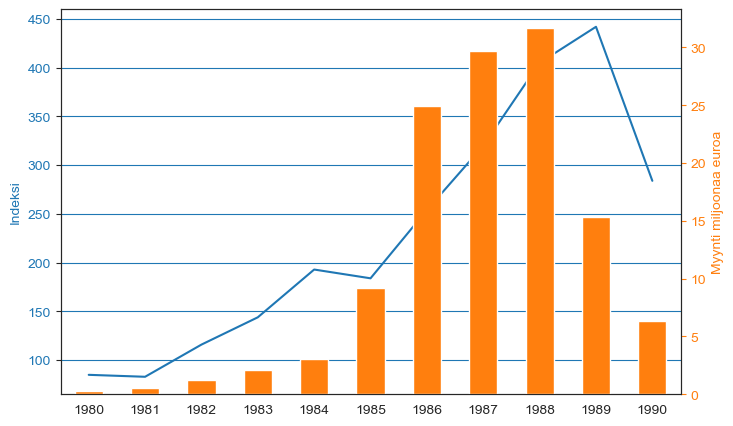

In [4]:
# Indeksi viivakaaviona.
# 'C0' viittaa vörikartan ensimmäiseen väriin.
df['Indeksi'].plot(color='C0', figsize=(8, 5))
plt.ylabel('Indeksi', color='C0')

# Vaakasuuntainen taustaviivoitus.
plt.grid(axis='y', color='C0')

# Jakoviivojen nimiöt.
plt.tick_params(axis='y', labelcolor='C0')

# Toinen kaavio, jolla on oma arvoakseli, mutta yhteinen x-akseli indeksin kanssa.
plt.twinx()

# Myynti pylväinä.
# 'C1' viittaa värikartan toiseen väriin.
(df['Myynti'] / 1000000).plot(kind='bar', color='C1')
plt.ylabel('Myynti miljoonaa euroa', color='C1')

# Jakoviivojen nimiöt.
plt.tick_params(axis='y', color='C1', labelcolor='C1')

### Lisätietoa

Seuraavassa osassa 4/7 opit laatimaan usean kaavion yhdistelmiä:

- [Usean kaavion yhdistelmä](https://github.com/taanila/kaaviot/blob/master/matplotlib4.ipynb)

Löydät kaikki muistiot osoitteesta https://tilastoapu.wordpress.com/python.